### Student Information
Name: 游湘潁

Student ID: 107034024

GitHub ID: Mittyu

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# Part 1: Lab1 take home exercise

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

## 2. Data Preparation

In [3]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [5]:
# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### 3.2 Familiarizing yourself with the Data

### >>> **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [6]:
X.describe()

category
count  2257.000000
mean      1.581303
std       1.095472
min       0.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000

In [7]:
X.head()

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

In [8]:
#Answer here

# 1. basic indexing using []
s = X['category_name']
display(s[:5])

# get the first 10 record of category and category_name
X[['category', 'category_name']][:10]

0             comp.graphics
1             comp.graphics
2    soc.religion.christian
3    soc.religion.christian
4    soc.religion.christian
Name: category_name, dtype: object

category           category_name
0         1           comp.graphics
1         1           comp.graphics
2         3  soc.religion.christian
3         3  soc.religion.christian
4         3  soc.religion.christian
5         3  soc.religion.christian
6         3  soc.religion.christian
7         2                 sci.med
8         2                 sci.med
9         2                 sci.med

In [9]:
# 2. Attribute Access with slicing range
X.text[::10][0:5]

0     From: sd345@city.ac.uk (Michael Collier) Subje...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20    From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30    From: vgwlu@dunsell.calgary.chevron.com (greg ...
40    From: david-s@hsr.no (David A. Sjoen) Subject:...
Name: text, dtype: object

In [10]:
# Simple slicing range
X[::2][10:20]

text  category  \
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
22  From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1   
26  From: christian@geneva.rutgers.edu Subject: en...         3   
28  From: rind@enterprise.bih.harvard.edu (David R...         2   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
32  From: doyle+@pitt.edu (Howard R Doyle) Subject...         2   
34  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
36  From: keith@cco.caltech.edu (Keith Allan Schne...         0   
38  From: darice@yoyo.cc.monash.edu.au (Fred Rice)...         0   

             category_name  
20  soc.religion.christian  
22  soc.religion.christian  
24           comp.graphics  
26  soc.religion.christian  
28                 sci.med  
30                 sci.med  
32                 sci.med  
34                 sci.med  
36             alt.atheism  
38             alt.atheism

In [11]:
# 4. Selection by label --> the label is the index now
X.loc['2250':]

text  category  \
2250  From: ingles@engin.umich.edu (Ray Ingles) Subj...         0   
2251  From: Mark-Tarbell@suite.com Subject: Amniocen...         2   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
2250   alt.atheism  
2251       sci.med  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med

In [12]:
# 5. Selection by callable (1)
X.loc[lambda df: df['category'] == 3, :]

text  category  \
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
...                                                 ...       ...   
2229  From: jcj@tellabs.com (jcj) Subject: Re: proof...         3   
2230  From: news@cbnewsk.att.com Subject: Re: Bible ...         3   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
5     soc.religion.christian  
6     soc.religion.christian  
...                      ...  
2229  soc.religion.christian  
2230  soc.religion.christian  
2246  soc.religion.christian  
2247  soc.religion.christian  
2249  soc.religion.christian  

[599 rows x 3 columns]

In [13]:
# 5. Selection by callable (2) (combined with slicing range)

X[lambda df: df.columns[0]][:5]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
Name: text, dtype: object

In [14]:
# 6. Fast scalar value getting and setting
# using 'at' and 'iat' to access a scalar value is the fastest way
X.at[5, 'category']

3

In [15]:
# 7. Indexing with isin
X[X['category_name'].isin(['soc.religion.christian', 'comp.graphics'])]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2246  From: lmvec@westminster.ac.uk (William Hargrea...         3   
2247  From: daniels@math.ufl.edu (TV's Big Dealer) S...         3   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   
2249  From: shellgate!llo@uu4.psi.com (Larry L. Over...         3   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2242           comp.graphics  
2246  soc.religion.christian  
2247  soc.religion.christian  
2248           comp.graphics  
2249  soc.religion.christian  

[1183 rows x 3 columns]

In [16]:
X[X['category']==1]

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
11    From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1   
14    From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1   
15    From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1   
...                                                 ...       ...   
2232  From: lipman@oasys.dt.navy.mil (Robert Lipman)...         1   
2236  From: dkusswur@falcon.depaul.edu (Daniel C. Ku...         1   
2241  From: dls@aeg.dsto.gov.au (David Silver) Subje...         1   
2242  From: Sean McMains <mcmains@unt.edu> Subject: ...         1   
2248  From: "danny hawrysio" <danny.hawrysio@canrem....         1   

      category_name  
0     comp.graphics  
1     comp.graphics  
11    comp.graphics  
14    comp.graphics  
15    comp.graphics  
...             ...  
2232  comp.graphics  
2236  comp.graphics  
2241  comp.graphics  
2242  comp.graphics  
2248  comp.graphics  

[584 rows x 3 columns]

In [17]:
# Using the query method
X.query('category > 1 and category < 3')

text  category  \
7     From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   
16    From: texx@ossi.com (Robert "Texx" Woodworth) ...         2   
28    From: rind@enterprise.bih.harvard.edu (David R...         2   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

     category_name  
7          sci.med  
8          sci.med  
9          sci.med  
16         sci.med  
28         sci.med  
...            ...  
2252       sci.med  
2253       sci.med  
2254       sci.med  
2255       sci.med  
2256       sci.med  

[594 rows x 3 columns]

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [18]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
result_with_series = X.append(dummy_series, ignore_index=True)

# dummy record as dictionary format
dummy_dict = [{'text': 'dummy_record', 'category': 1  }]
X = X.append(dummy_dict, ignore_index=True)
X.dropna(inplace=True)

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [19]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

#### Answer
The type of 'missing example' in `'C'`, `'D'`, and `'F'` are string, thus it is not considered as null even though it seems like null.

Through observing the data types of the given 'missing_example' dataset, 
we can found out that the string type is not considered as a null value.
Thus, even though 'NaN' and 'None' seem to be null, they are actually string type
values.
The np.nan is shown as float type, and this is to allow NaN values propagate 
through all operations without raising an exception.

To sum up, it is really important that we do data cleaning in the very beginning
to avoid this kind of situation that the string `'NaN'` and empty string `' '` may be not considered as real `None` or `NULL`.

In [20]:
# Answer here
for ind in NA_df.index:
     print(NA_df['id'][ind], type(NA_df['missing_example'][ind]), '\t', pd.isnull(NA_df['missing_example'][ind]))

A <class 'float'> 	 True
B <class 'float'> 	 True
C <class 'str'> 	 False
D <class 'str'> 	 False
E <class 'NoneType'> 	 True
F <class 'str'> 	 False


In [21]:
# Data cleaning process
missing_values = ["n/a", "na", "--", "NaN", "None", ""]
NA_df = NA_df.replace(missing_values, np.nan)

# Through the data cleaning process, we can 
# make all missing value with string type to np.nan.

pd.isnull(NA_df['missing_example'])

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### 4.2 Dealing with Duplicate Data

In [22]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

X = X.append(dummy_duplicate_dict, ignore_index=True)
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

import copy
# Perform a deep copy of the X before sampling for the take home exercise 6
X_before_sampling = copy.deepcopy(X)

## 5.  Data Preprocessing

### 5.1 Sampling

In [23]:
# 抽樣
X_sample = X.sample(n=1000) #random state

### >>> **Exercise 6 (take home):**
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [24]:
# Answer here

# Both dataframes have the same shape
print("After sampling:", X.shape, type(X))
print("Before sampling:", X_before_sampling.shape, type(X_before_sampling))

# Both dataframes have the same column names
print("\nAfter sampling:", X.columns)
print("Before sampling:", X_before_sampling.columns)

# Both dataframes hae the same first 5 rows of data
print(display(X.head()))
print(display(X_before_sampling.head()))

After sampling: (2257, 3) <class 'pandas.core.frame.DataFrame'>
Before sampling: (2257, 3) <class 'pandas.core.frame.DataFrame'>

After sampling: Index(['text', 'category', 'category_name'], dtype='object')
Before sampling: Index(['text', 'category', 'category_name'], dtype='object')


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

None


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian

None


In [25]:
print(X.compare(X_before_sampling))

Empty DataFrame
Columns: []
Index: []


### Answer
From the quary and comparing process above, it is quite obvious that nothing has changed after the sampling process. The dataframes before and after sampling has same attributes, shapes and they are in the same type. Also seen in the output above, the first 5 records are the same. To get a comparison of the two 'whole' dataframes, I utilized the `compare()` function from `pandas.DataFrame` and the result output `Empty DataFrame` that shows there is no difference betweed the two dataframes.

--> check Documentation here: [pandas.DataFrame.compare](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 
![alt txt](https://i.imgur.com/9eO431H.png)

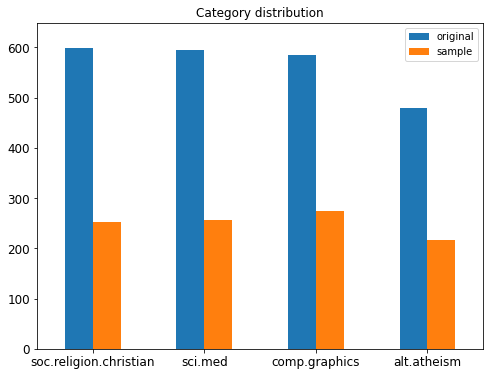

In [27]:
# Answer here

# set the upperbound
# concatenate the two dataframes for plotting: sampling data and original data

upperbound = max(X.category_name.value_counts()) + 50
df = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)

# Set the columns' title, it will show in the legend part on the plot
df.columns = ["original", "sample"]
df.plot(kind="bar", title = 'Category distribution', ylim = [0, upperbound], 
         rot = 0, fontsize = 12, figsize = (8,6))
plt.show()

### 5.2 Feature Creation

In [28]:
# Natural language processing toolkit
import nltk

# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

### 5.3 Feature subset selection

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()
analyze("Hello World!")
# does not consider punctuation marks (e.g. !, ?, -, etc.) 
# and switch all to lower case
#" ".join(list(X[4:5].text))

['hello', 'world']

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [30]:
# Answer here

# use np.nonzero to find the nonzero entrance
# --> get the location of the nonzero entrance
# --> get the col index of the targeted 1 (use [-1][-1] to locate the last col index)
# And then use the count_vect.get_feature_names to get the term

count_vect.get_feature_names_out()[np.nonzero(X_counts[:5, 0:100])[-1][-1]]

'01'

In [31]:
# Second method:
# get the index of the nonzero value in the document
for i in X_counts[0:5, 0:100].nonzero()[1]:
    print(count_vect.get_feature_names_out()[i])

00
01


---

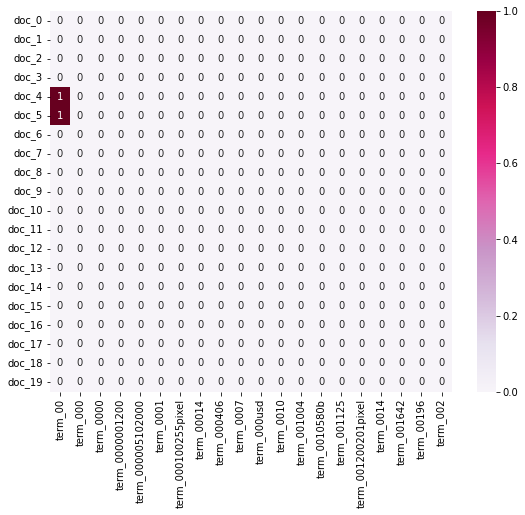

In [32]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

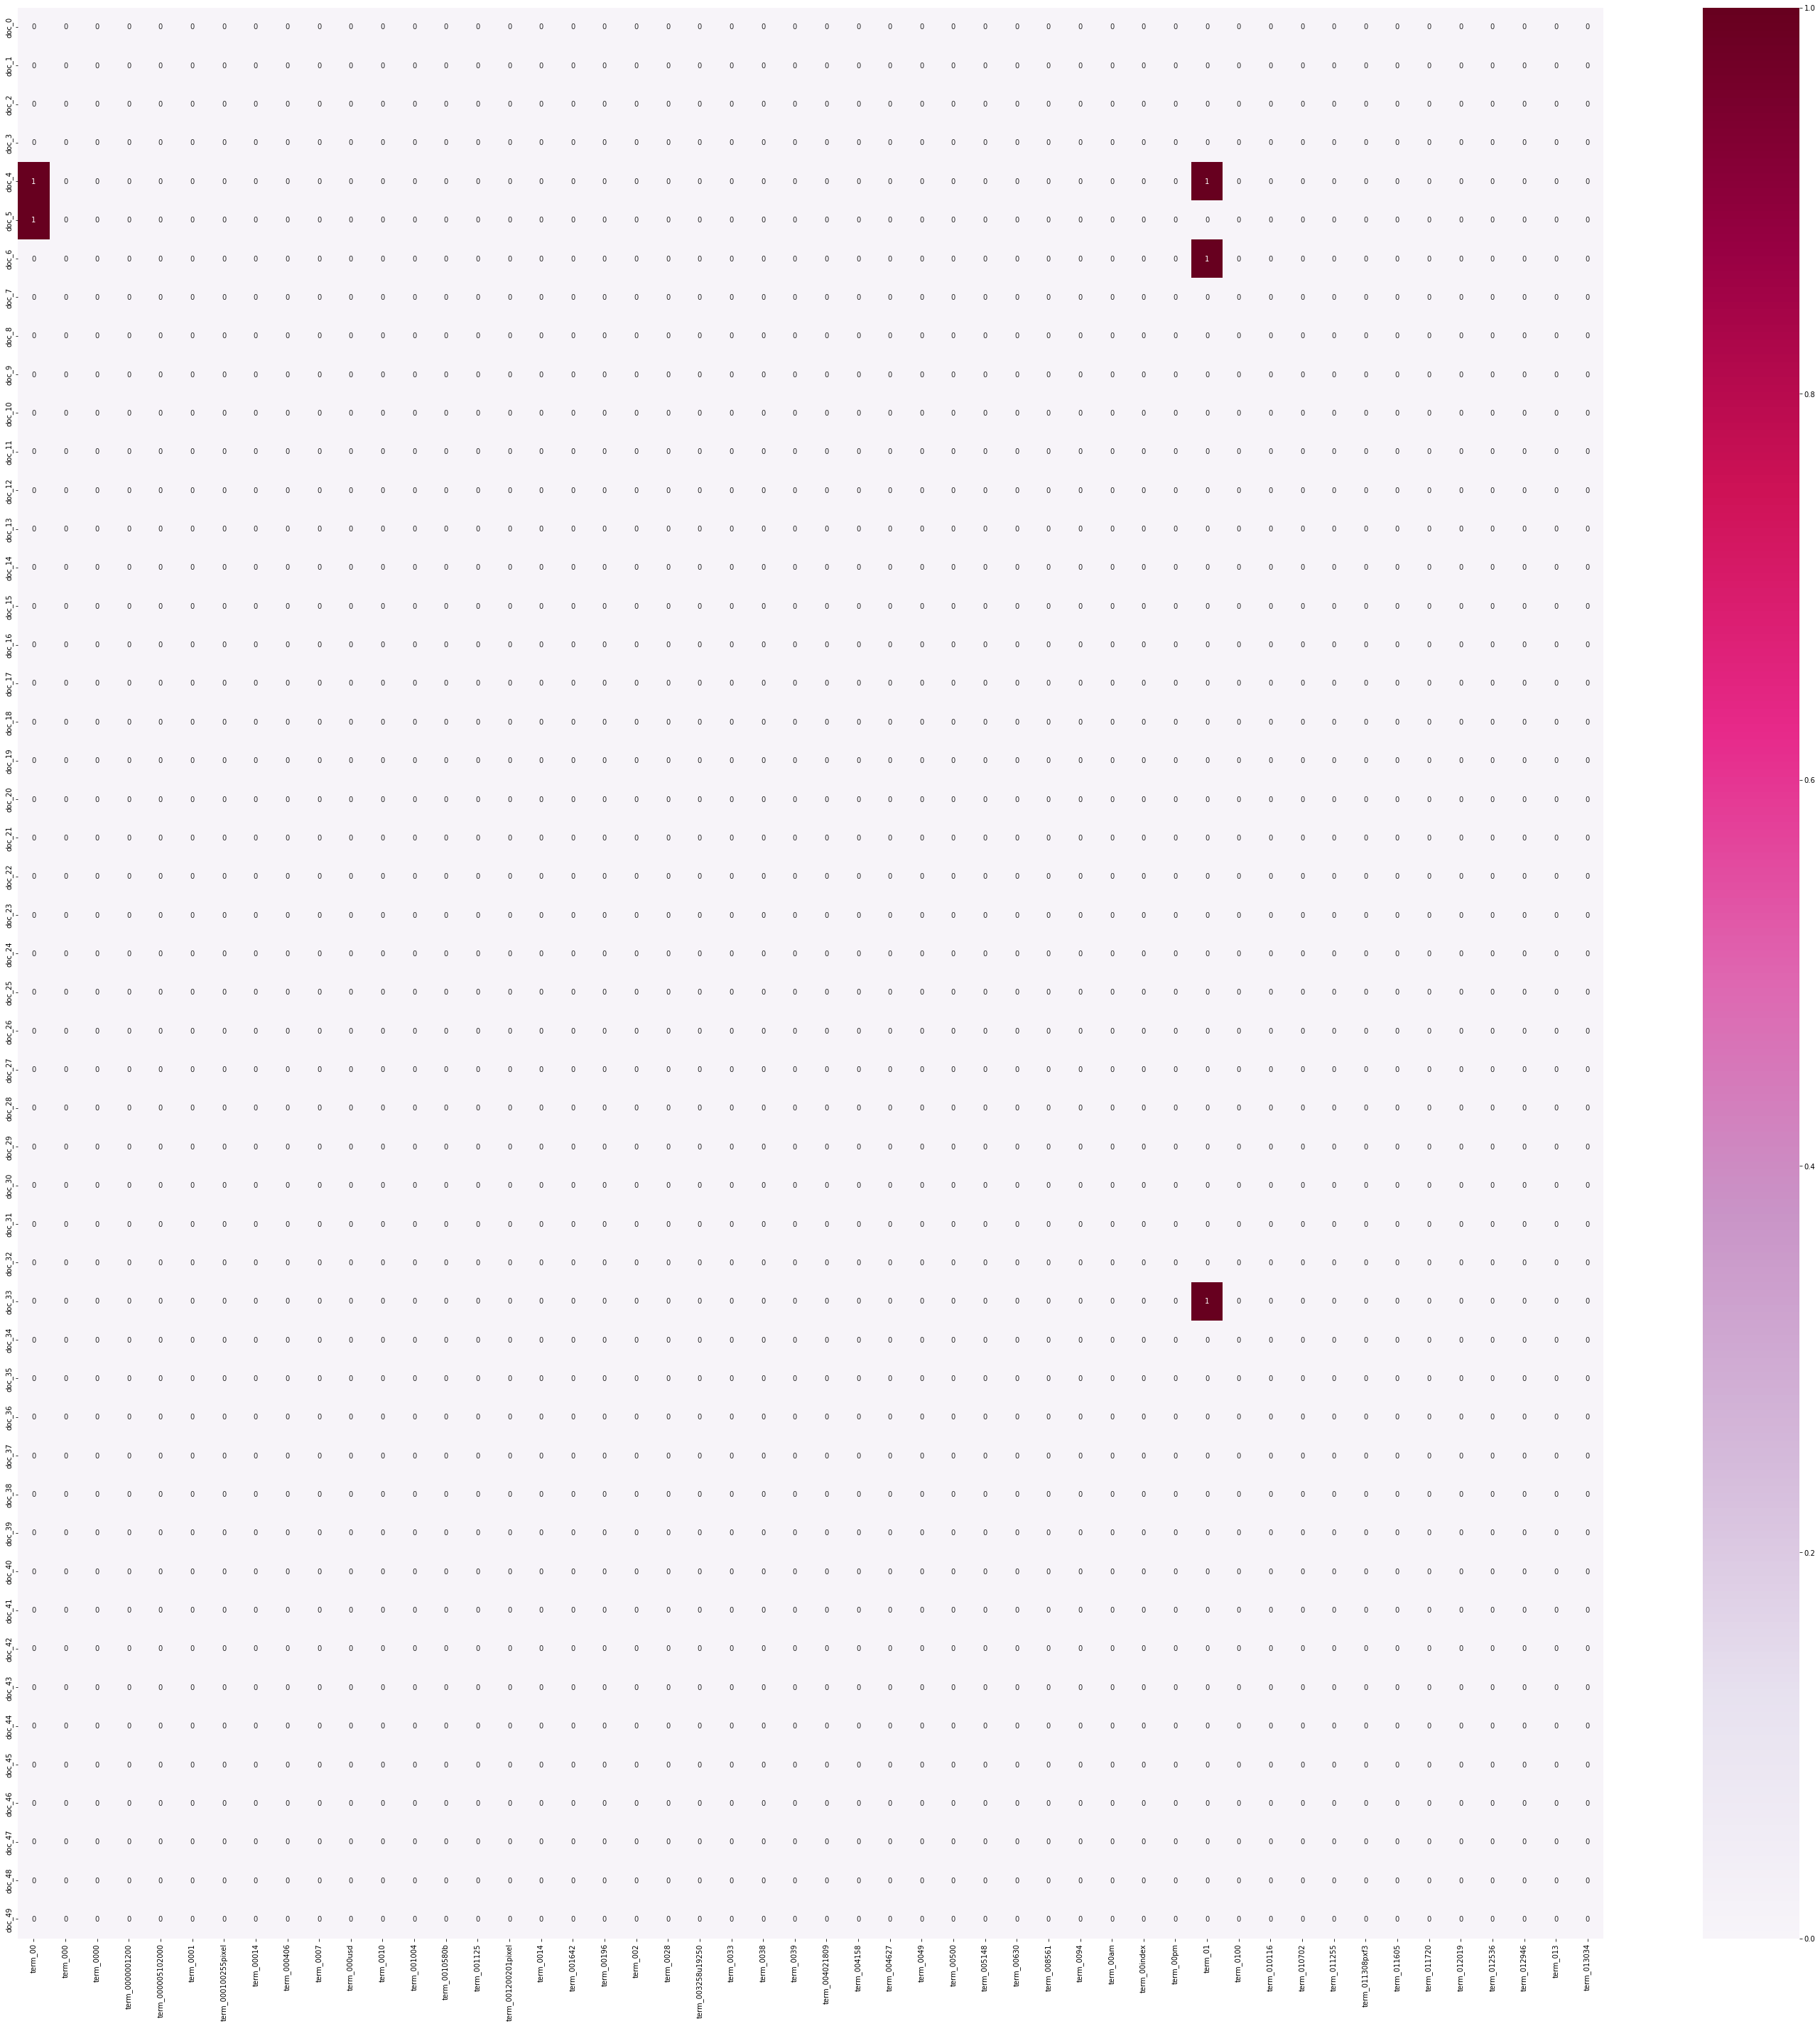

In [33]:
# Answer here

# Change the number of articles and terms to 50, 50
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:50]]
plot_z = X_counts[0:50, 0:50].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(50, 50))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

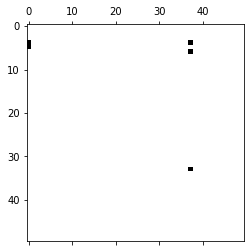

In [34]:
# Use matplotlib.pyplot.spy to draw the above data ([0:50, 0:50])
plt.spy(df_todraw)

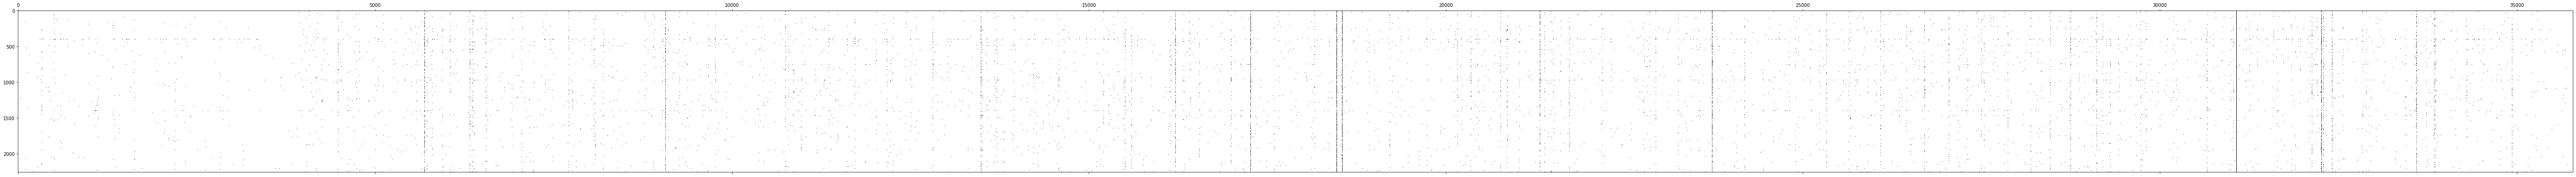

In [35]:
# Draw the entire term-document matrix with `spy`

# set the data to plot the entire term-document matrix
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[:]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[:]]
plot_z = X_counts[:, :].toarray()
plt.subplots(figsize=(100, 10))

df_todraw_all = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

# Use matplotlib.pyplot.spy to plot the sparsity pattern of a 2D array.
# This visualizes the non-zero values of the array.
# x axis: number of terms, y axis: number of articles
plt.spy(df_todraw_all)

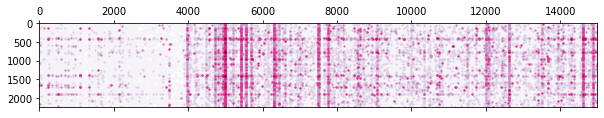

In [36]:
# heatmap-like visualization using matplotlib spy
precisions = [0, 2, 5, 10, 50, 200]
# color palette reference: cmap='PuRd'
colors = ['#F6F3F8', '#DDCCE4', '#CD8AC2', '#E6308E', '#B80B4E', '#67001F']

plt.subplots(figsize=(10, 20))

# plot first 15000 terms
for p, c in zip(precisions, colors):
    plt.spy(X_counts[:, :15000], precision=p, markersize=1, color=c)

plt.show()

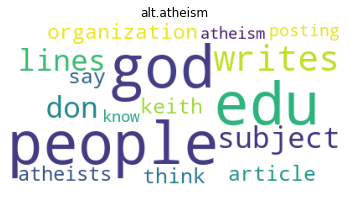

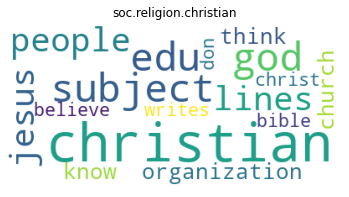

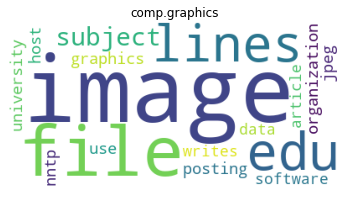

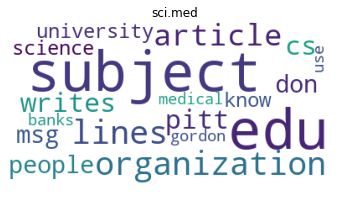

In [38]:
# Word cloud
# Extract the most meaningful information from the comments of specifies companies
# important: remember to filter out stop words
def frequency_output(df, value):
    count_vect = CountVectorizer(stop_words='english')
    df_count = count_vect.fit_transform(df.text)
    analyze = count_vect.build_analyzer()
    d = {}
    for word in analyze(' '.join(list(df.text))):
        if word in d.keys():
            d[word] += 1
        else:
            d[word] = 1
            
    return {k:v for k, v in sorted(d.items(), key = lambda item: item[1])[::-1]}

# take imbd as example
# categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


df_alt = X[(X.category_name == 'alt.atheism')]
df_soc = X[(X.category_name == 'soc.religion.christian')]
df_comp = X[(X.category_name == 'comp.graphics')]
df_sci = X[(X.category_name == 'sci.med')]

freq_alt = frequency_output(df_alt, 0)
freq_soc = frequency_output(df_soc, 0)
freq_comp = frequency_output(df_comp, 0)
freq_sci = frequency_output(df_sci, 0)


from wordcloud import WordCloud

# Plot out the most frequent words from the sentences
# which tells us what things people tend to care more about the most.

# acting, plots, character and scripts --> the factor of what good movies should have.

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_alt)[:20])))
plt.axis("off")
plt.title("alt.atheism")
plt.show()

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_soc)[:20])))
plt.axis("off")
plt.title("soc.religion.christian")
plt.show()

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_comp)[:20])))
plt.axis("off")
plt.title("comp.graphics")
plt.show()

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_sci)[:20])))
plt.axis("off")
plt.title("sci.med")
plt.show()

#### Answer
By judging from the word cloud, we can see that different categories match different realms thus having different kind of words. For example, `comp.graphics` which is related to computer graphics, have words such as image, file, etc. For `soc.religion.christian`, words such as god, christian, etc show up the most.

### 5.4 Dimensionality Reduction

In [39]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

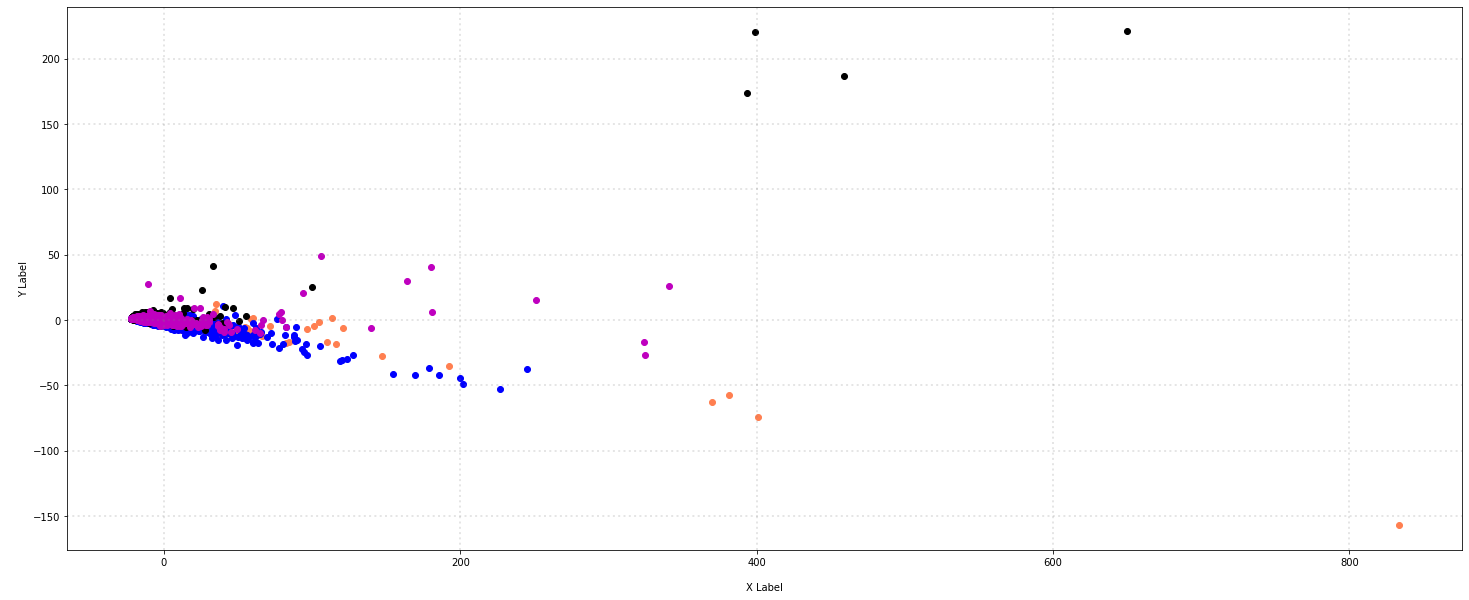

In [40]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

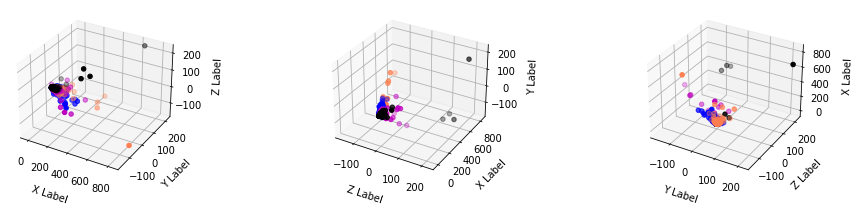

In [41]:
# Answer here
X_3Dim = PCA(n_components = 3).fit_transform(X_counts.toarray())

from mpl_toolkits import mplot3d

fig = plt.figure(figsize=plt.figaspect(0.2))
# ax = plt.axes(projection='3d')
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_3Dim[X['category_name'] == category].T[0]
    zs = X_3Dim[X['category_name'] == category].T[1]
    ys = X_3Dim[X['category_name'] == category].T[2]
    
    ax1.scatter3D(xs, ys, zs, c=c, marker='o')
    ax2.scatter3D(zs, xs, ys, c=c, marker='o')
    ax3.scatter3D(ys, zs, xs, c=c, marker='o')


ax1.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax1.set_xlabel('\nX Label')
ax1.set_ylabel('\nY Label')
ax1.set_zlabel('\nZ Label')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nZ Label')
ax2.set_ylabel('\nX Label')
ax2.set_zlabel('\nY Label')

ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('\nY Label')
ax3.set_ylabel('\nZ Label')
ax3.set_zlabel('\nX Label')

plt.show()

In [42]:
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

from mpl_toolkits.mplot3d import Axes3D

# plot 3D function
def plot3D(data, elev, azim):
    fig = plt.figure(figsize = (20,10))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    
    for c, category in zip(col, categories):
        xs = data[X['category_name'] == category].T[0]
        ys = data[X['category_name'] == category].T[1]
        zs = data[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', s=100, alpha=0.8)

    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    ax.view_init(elev, azim)
    plt.show()

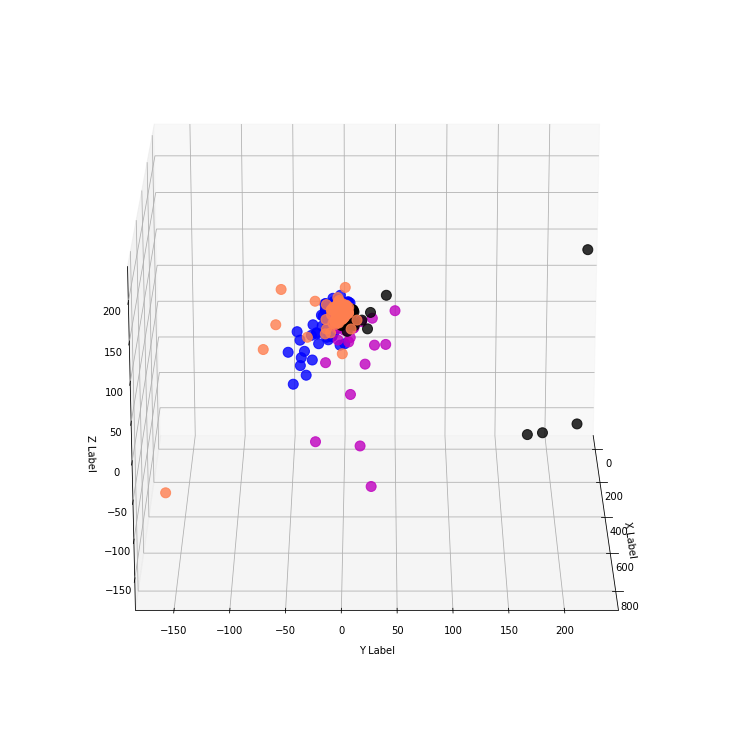

In [43]:
# plot 2
plot3D(X_reduced, 20, 0)

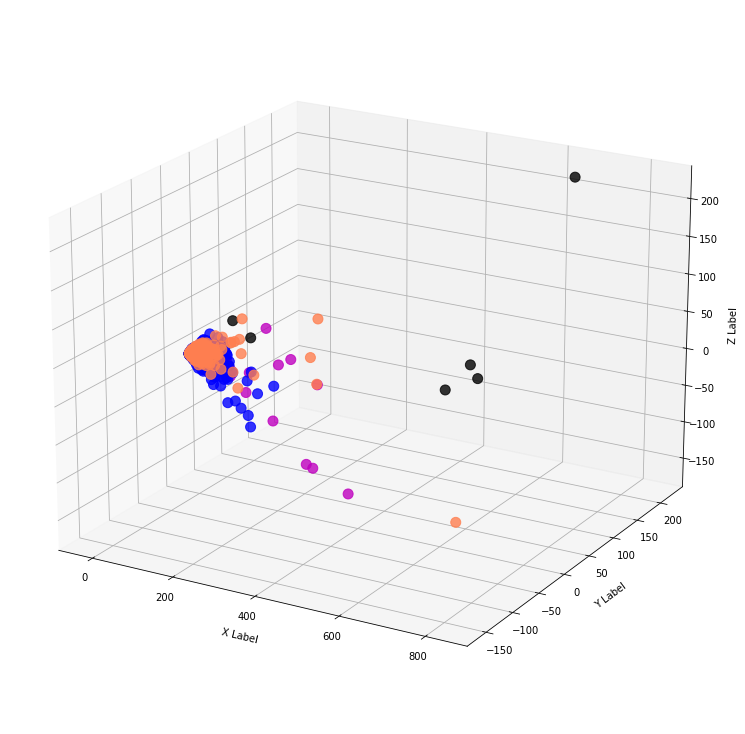

In [44]:
# plot 3
plot3D(X_reduced, 20, 300)

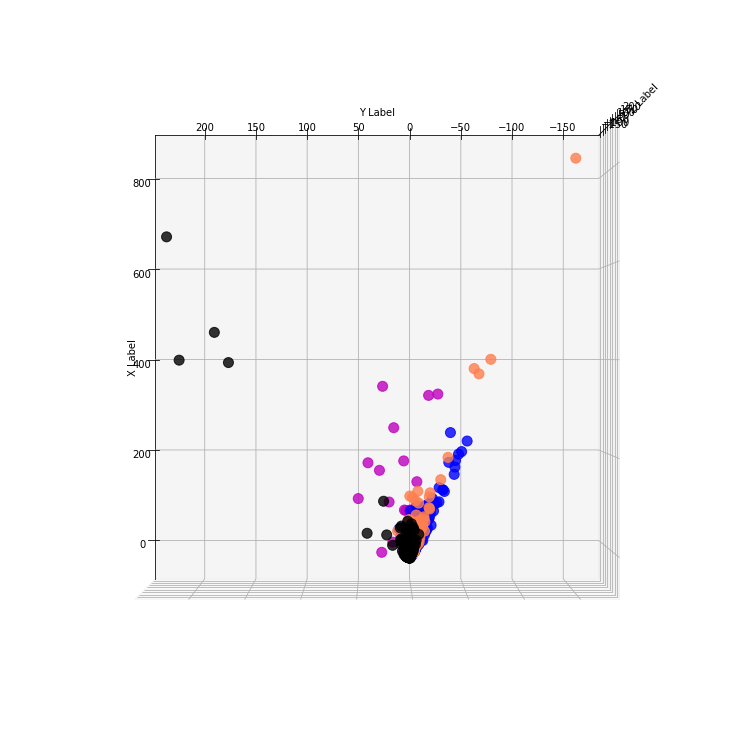

In [45]:
# plot 4
plot3D(X_reduced, 90, 180)

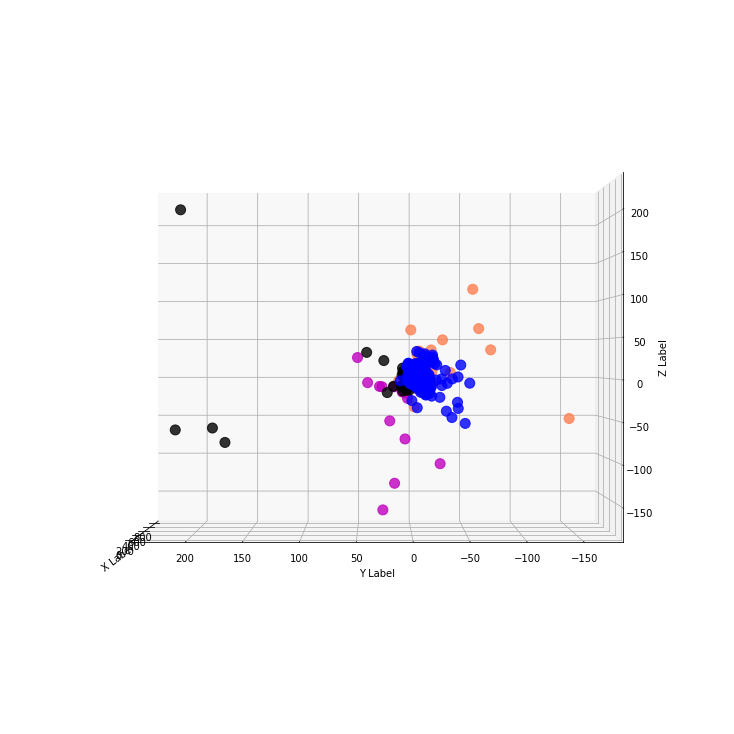

In [46]:
# plot 5
plot3D(X_reduced, 0, 180)

In [47]:
# plotly
import plotly.express as px
df = pd.DataFrame()

for c, category in zip(col, categories):
    xs = X_3Dim[X['category_name'] == category].T[0]
    ys = X_3Dim[X['category_name'] == category].T[1]
    zs = X_3Dim[X['category_name'] == category].T[2]
    df_sub = pd.DataFrame({'X':xs, 'Y':ys, 'Z':zs})
    df_sub['Category'] = category
    df = pd.concat([df, df_sub])
    

fig = px.scatter_3d(df, x='X', y='Y', z='Z',
              color='Category')

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

#### Answer
<img src= "./HW_attachment/Screen%20Shot%202021-10-28%20at%2012.15.38%20AM.png"  style="zoom:50%;"/>

From the screen shot of the plot 4 above, we can see that the data of different can be merely separated through those grey lines. Also, through moving the plotly 3D plot, we can find out that no matter which category, most data have low x,y and z, thus concentrate on the (0,0,0) to (100, 50\~-50, 50\~-50), then spread out when X label increases, kind of forming a cone.

<img src="./HW_attachment/image-20211028004242995.png"  style="zoom:50%;"/>

### 5.5 Atrribute Transformation / Aggregation

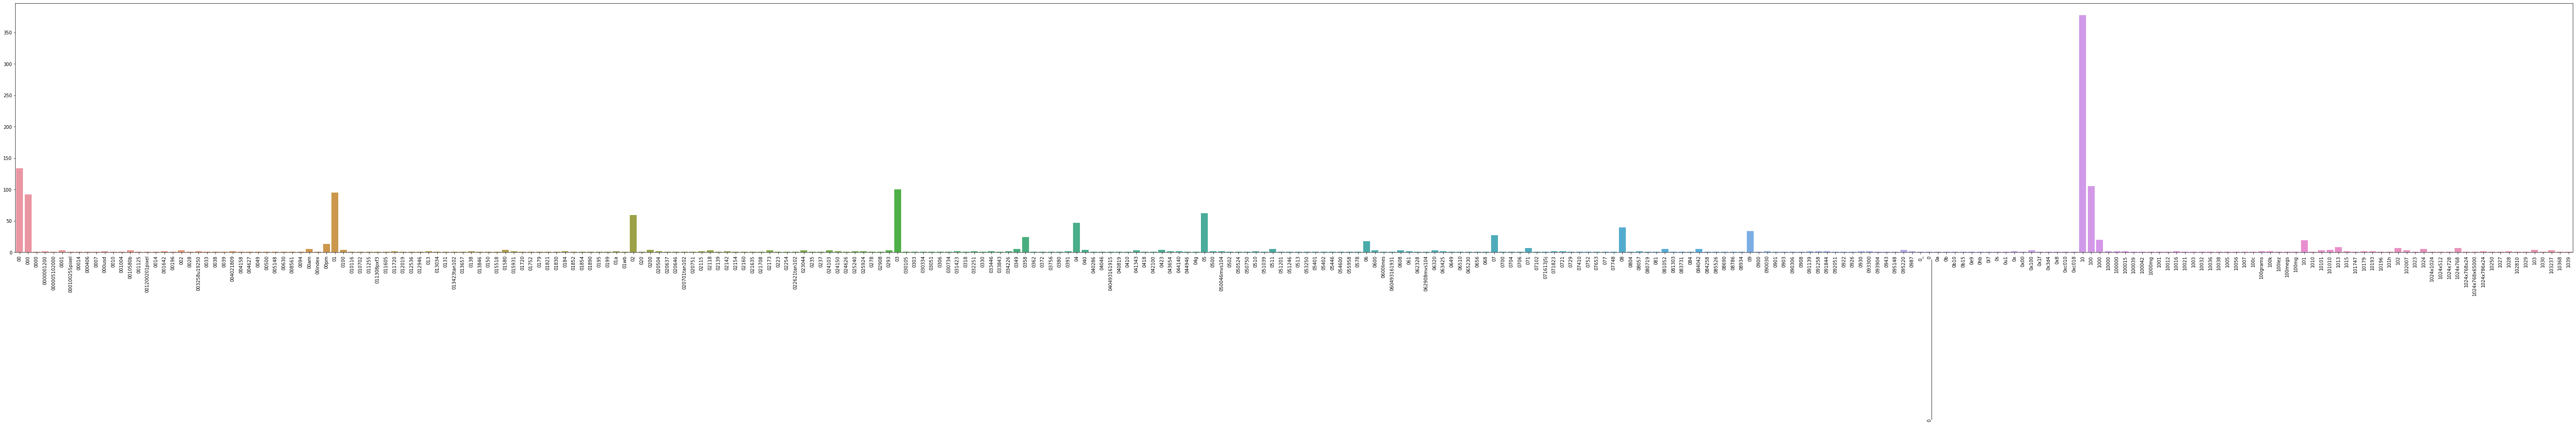

In [48]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [49]:
# Answer here
import plotly.express as px

df = pd.DataFrame({'term':count_vect.get_feature_names_out()[:], 'freq':term_frequencies[:]})

fig = px.bar(df[:300], x="term", y="freq", color="freq")
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [50]:
# Answer here
# Use the indexing and selection techniques to reduce terms

fig = px.bar(df[:20], x="term", y="freq", color='freq', template='ggplot2')
fig.show()

In [51]:
# Only get those that has over 5000 times of frequency from the whole data
# let color change as the frequency changes

fig = px.bar(df[df['freq'] > 5000], x="term", y="freq", color='freq', template='ggplot2')
fig.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [52]:
# Answer here
fig = px.bar(df[:300], x="term", y="freq", color="freq")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [53]:
# Only get those with frequency over 5000 and do the sorting
fig = px.bar(df[df['freq'] > 5000], x="term", y="freq", color="freq")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

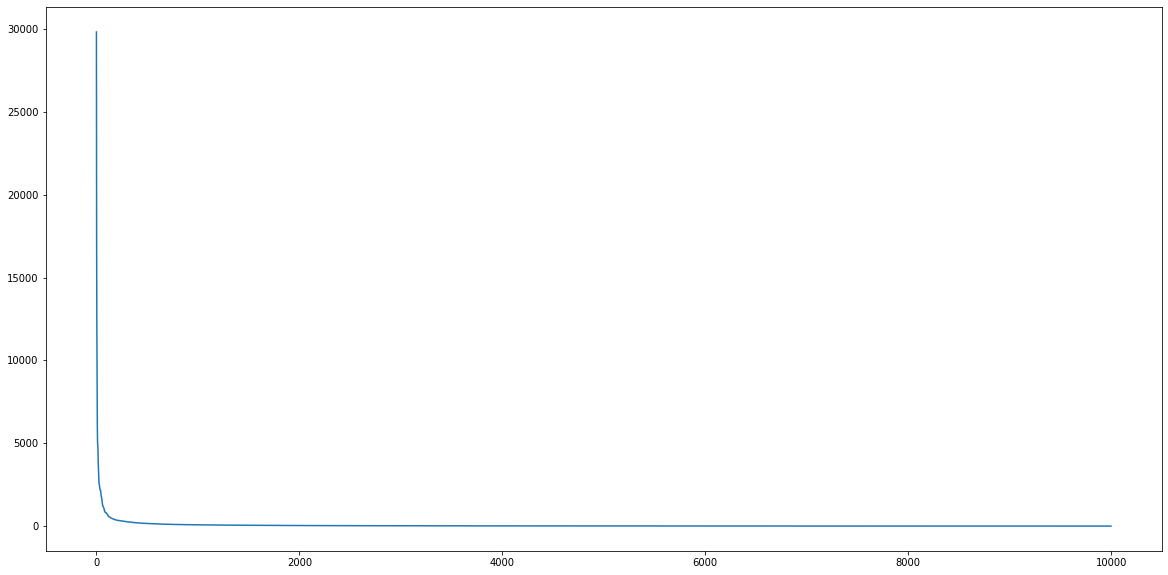

In [54]:
# the long tail plot
N = 10000
index = np.arange(N)
term_frequencies_sorted = np.sort(term_frequencies)[::-1]
fig = plt.figure(figsize = (20,10))
plt.plot(index, term_frequencies_sorted[:N])
plt.show()

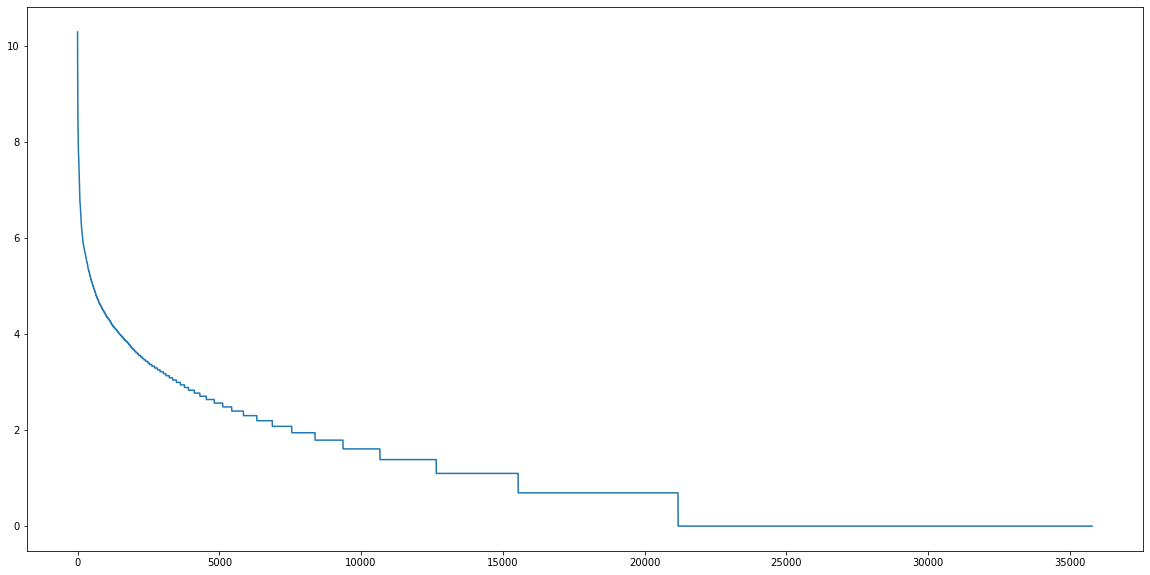

In [55]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
N = X_counts.shape[1]
index = np.arange(N)
term_frequencies_log_sorted = np.sort(term_frequencies_log)[::-1]
fig = plt.figure(figsize = (20,10))
plt.plot(index, term_frequencies_log_sorted[:N])
plt.show()


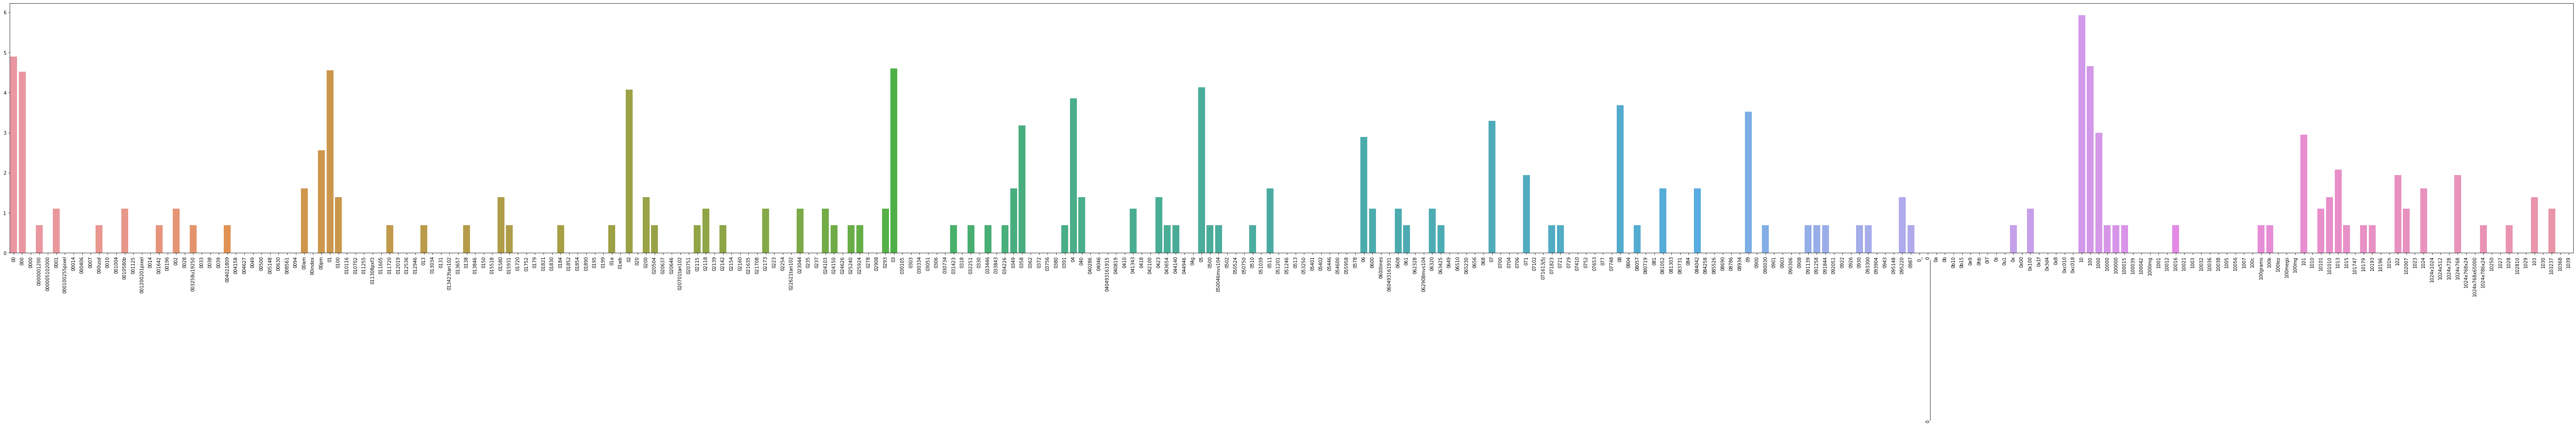

In [56]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization

In [57]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [58]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  \
0              comp.graphics   
1              comp.graphics   
2     soc.religion.christian   
3     soc.religion.christian   
4     soc.religion.christian   
...                      ...   
2252                 sci.med   
2253                 sci.med   
2254                 sci.med   
2255                 sci.med   
2256                 sci.med   

                                               unigrams  bin_category  
0     [From, :, sd345, @, city.ac.uk, (, Michael, Co...  [0, 1, 0, 0]  
1     [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  [0, 1, 0, 0]  
2     [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  [0, 0, 0, 1]  
3     [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...  [0, 0, 0, 1]  
4     [From, :, stanly, @, grok11.columbiasc.ncr.com...  [0, 0, 0, 1]  
...                                                 ...           ...  
2252  [From, :, roos, @, Operoni.Helsinki.FI, (, Chr...  [0, 0, 1, 0]  
2253  [From, :, mhollowa, @, ic.sunysb.edu, (, Micha...  [0, 0, 1, 0]  
2254  [From, :, sasghm, @, theseus.unx.sas.com, (, G...  [0, 0, 1, 0]  
2255  [From, :, Dan, Wallach, <, dwallach, @, cs.ber...  [0, 0, 1, 0]  
2256  [From, :, dyer, @, spdcc.com, (, Steve, Dyer, ...  [0, 0, 1, 0]  

[2257 rows x 5 columns]

# 6. Data Exploration

In [59]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['From: ab@nova.cc.purdue.edu (Allen B) Subject: Re: TIFF: philosophical significance of 42 Organization: Purdue University Lines: 39  In article <prestonm.735400848@cs.man.ac.uk> prestonm@cs.man.ac.uk (Martin   Preston) writes: > Why not use the PD C library for reading/writing TIFF files? It took me a > good 20 minutes to start using them in your own app.  I certainly do use it whenever I have to do TIFF, and it usually works very well.  That\'s not my point.  I\'m >philosophically< opposed to it because of its complexity.  This complexity has led to some programs\' poor TIFF writers making some very bizarre files, other programs\' inability to load TIFF images (though they\'ll save them, of course), and a general inability to interchange images between different environments despite the fact they all think they understand TIFF.  As the saying goes, "It\'s not me I\'m worried about- it\'s all the >other<  assholes out there!"  I\'ve had big trouble with misuse and abuse of TIFF over 

In [60]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [61]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.608862
Cosine Similarity using count bw 1 and 3: 0.622050
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Part 2: the new dataset

## 1. The Data
This dataset was created for the Paper 'From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015
Please cite the paper if you want to use it :)

It contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants

**Format:**
sentence \t score \n


**Details:**
Score is either 1 (for positive) or 0 (for negative)	
The sentences come from three different websites/fields:

imdb.com
amazon.com
yelp.com

For each website, there exist 500 positive and 500 negative sentences. Those were selected randomly for larger datasets of reviews. 
We attempted to select sentences that have a clearly positive or negative connotaton, the goal was for no neutral sentences to be selected.

For the full datasets look:

imdb: Maas et. al., 2011 'Learning word vectors for sentiment analysis'
amazon: McAuley et. al., 2013 'Hidden factors and hidden topics: Understanding rating dimensions with review text'
yelp: Yelp dataset challenge http://www.yelp.com/dataset_challenge


## 2. Data Preparation

In [62]:
import os
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import helpers.data_mining_helpers as dmh

In [63]:
def build_dataframe(file, cmp):
    dic = {'imdb':1, 'amazon':2, 'yelp':3}
    with open(file, 'r', encoding='utf-8') as reader:
        lines = reader.readlines()
        sentence = list()
        label = list()
        for l in lines:
            split = l.split('\t')
            sentence.append(split[0])
            label.append(split[1].rstrip())
            
        # Add company to the dataframe
        df = pd.DataFrame({'sentence': sentence, 'label': label, 'company_name':cmp, 'company':dic[cmp]})

    return df

In [64]:
# set the path of the new dataset
path = './sentiment labelled sentences'

f_imdb = os.path.join(path, 'imdb_labelled.txt')
f_amazon = os.path.join(path, 'amazon_cells_labelled.txt')
f_yelp = os.path.join(path, 'yelp_labelled.txt')

# 3. Data transformation

In [65]:
# read file and convert into pandas dataframe
df_imdb = build_dataframe(f_imdb, 'imdb')
df_amazon = build_dataframe(f_amazon, 'amazon')
df_yelp = build_dataframe(f_yelp, 'yelp')

df = pd.concat([df_imdb, df_amazon, df_yelp], keys=['imdb', 'amazon', 'yelp'], ignore_index=True)

In [66]:
print(df.columns)
print('Shape: ', df.shape)
print('Len: ', len(df))
df.head()

Index(['sentence', 'label', 'company_name', 'company'], dtype='object')
Shape:  (3000, 4)
Len:  3000


sentence label company_name  \
0  A very, very, very slow-moving, aimless movie ...     0         imdb   
1  Not sure who was more lost - the flat characte...     0         imdb   
2  Attempting artiness with black & white and cle...     0         imdb   
3       Very little music or anything to speak of.       0         imdb   
4  The best scene in the movie was when Gerardo i...     1         imdb   

   company  
0        1  
1        1  
2        1  
3        1  
4        1

In [67]:
df.sentence[:10]

0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
5    The rest of the movie lacks art, charm, meanin...
6                                  Wasted two hours.  
7    Saw the movie today and thought it was a good ...
8                                 A bit predictable.  
9    Loved the casting of Jimmy Buffet as the scien...
Name: sentence, dtype: object

In [68]:
df.label[:10]

0    0
1    0
2    0
3    0
4    1
5    0
6    0
7    1
8    0
9    1
Name: label, dtype: object

In [69]:
df.sentence[0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [70]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                         company_name                             company  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [71]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### 4.2 Dealing with Duplicate Data

In [72]:
print(sum(df.duplicated()))
df.drop_duplicates(keep=False, inplace=True)
df.shape

17


(2966, 4)

In [73]:
# remove punctuation
translator = str.maketrans('', '', string.punctuation)
df['sentence'] = df['sentence'].apply(lambda s : s.translate(translator))
# turn into lower case
df['sentence'] = df['sentence'].apply(lambda s : s.lower())

In [74]:
# generate document-term matrix
count_vect_2 = CountVectorizer()
data_counts = count_vect_2.fit_transform(df.sentence)
data_counts.shape

(2966, 5374)

## 5. Data Preprocessing

### 5.1 Sampling

In [75]:
sample = df.sample(n=1000) #random state
len(sample)

1000

In [76]:
sample.head()

sentence label company_name  \
2940                               it was equally awful     0         yelp   
1887                                  best headset ever     1       amazon   
856   its dumb and pointless and a complete waste of...     0         imdb   
1400                              what a disappointment     0       amazon   
1906  but despite these few flaws this case is of ex...     1       amazon   

      company  
2940        3  
1887        2  
856         1  
1400        2  
1906        2

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

imdb      994
yelp      992
amazon    980
Name: company_name, dtype: int64


<AxesSubplot:title={'center':'Company distribution'}>

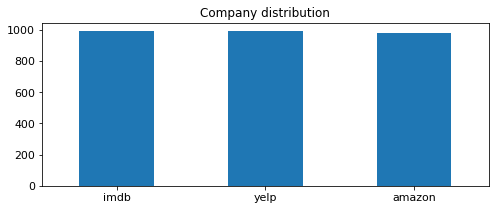

In [78]:
print(df.company_name.value_counts())
upperbound = max(df.company_name.value_counts()) + 50

# plot barchart for X_sample
df.company_name.value_counts().plot(kind = 'bar',
                                    title = 'Company distribution',
                                    ylim = [0, upperbound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

imdb      352
amazon    331
yelp      317
Name: company_name, dtype: int64


<AxesSubplot:title={'center':'Company distribution'}>

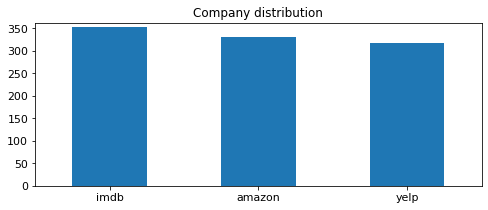

In [79]:
print(sample.company_name.value_counts())
upperbound = max(sample.company_name.value_counts()) + 10

# plot barchart for X_sample
sample.company_name.value_counts().plot(kind = 'bar',
                                    title = 'Company distribution',
                                    ylim = [0, upperbound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

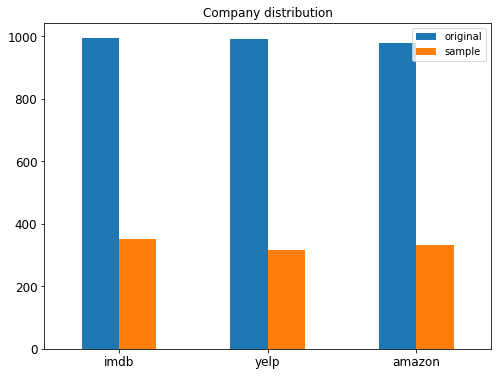

In [80]:
upperbound = max(df.company_name.value_counts()) + 50

df_plot = pd.concat([df.company_name.value_counts(), sample.company_name.value_counts()], axis=1)
df_plot.columns = ["original", "sample"]

df_plot.plot(kind="bar", title = 'Company distribution', ylim = [0, upperbound], 
         rot = 0, fontsize = 12, figsize = (8,6))
plt.show()

### 5.2 Feature Creation

In [81]:
import nltk

# takes a like a minute or two to process
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df['unigrams'].head()

0    [a, very, very, very, slowmoving, aimless, mov...
1    [not, sure, who, was, more, lost, the, flat, c...
2    [attempting, artiness, with, black, white, and...
3    [very, little, music, or, anything, to, speak,...
4    [the, best, scene, in, the, movie, was, when, ...
Name: unigrams, dtype: object

In [82]:
df.head()

sentence label company_name  \
0  a very very very slowmoving aimless movie abou...     0         imdb   
1  not sure who was more lost  the flat character...     0         imdb   
2  attempting artiness with black  white and clev...     0         imdb   
3        very little music or anything to speak of       0         imdb   
4  the best scene in the movie was when gerardo i...     1         imdb   

   company                                           unigrams  
0        1  [a, very, very, very, slowmoving, aimless, mov...  
1        1  [not, sure, who, was, more, lost, the, flat, c...  
2        1  [attempting, artiness, with, black, white, and...  
3        1  [very, little, music, or, anything, to, speak,...  
4        1  [the, best, scene, in, the, movie, was, when, ...

### 5.3 Feature subset selection

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect_new = CountVectorizer()
df_counts = count_vect_new.fit_transform(df.sentence)

analyze = count_vect_new.build_analyzer()
analyze(df.sentence[0])

['very',
 'very',
 'very',
 'slowmoving',
 'aimless',
 'movie',
 'about',
 'distressed',
 'drifting',
 'young',
 'man']

In [84]:
count_vect_new.get_feature_names_out()[0:10]

array(['010', '10', '100', '1010', '11', '110', '1199', '12', '13', '15'],
      dtype=object)

In [85]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [86]:
plot_x = ["term_"+str(i) for i in count_vect_new.get_feature_names_out()[80:100]]
plot_x

['term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 'term_about',
 'term_above',
 'term_abovepretty',
 'term_abroad',
 'term_absolute',
 'term_absolutel',
 'term_absolutely',
 'term_absolutley',
 'term_abstruse',
 'term_abysmal',
 'term_ac',
 'term_academy',
 'term_accents',
 'term_accept',
 'term_acceptable',
 'term_access']

In [87]:
plot_y = ["doc_"+ str(i) for i in list(df.index)[80:100]]

In [88]:
plot_z = df_counts[50:70, 50:70].toarray()

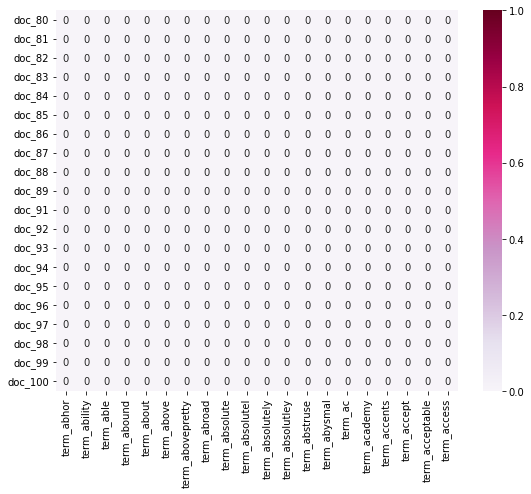

In [89]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

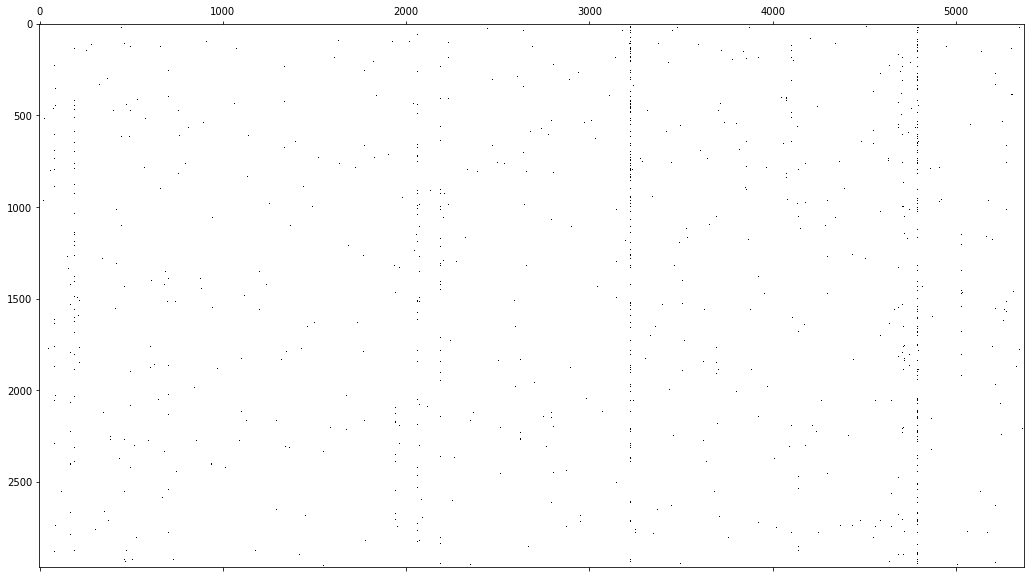

In [90]:
plot_x = ["term_"+str(i) for i in count_vect_new.get_feature_names_out()[:]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[:]]
plot_z = df_counts[:, :].toarray()
plt.subplots(figsize=(100, 10))

df_todraw_all = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

# Use matplotlib.pyplot.spy to plot the sparsity pattern of a 2D array.
# This visualizes the non-zero values of the array.
# x axis: number of terms, y axis: number of articles
plt.spy(df_todraw_all)

### 5.4 Dimensionality Reduction

In [91]:
from sklearn.decomposition import PCA

df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced

array([[-0.81832538, -0.20504045],
       [ 1.27315857, -0.94137612],
       [ 2.94571637,  1.13916932],
       ...,
       [-0.49761754,  0.5178689 ],
       [ 0.51695005,  0.43263673],
       [ 2.3331437 , -0.65258621]])

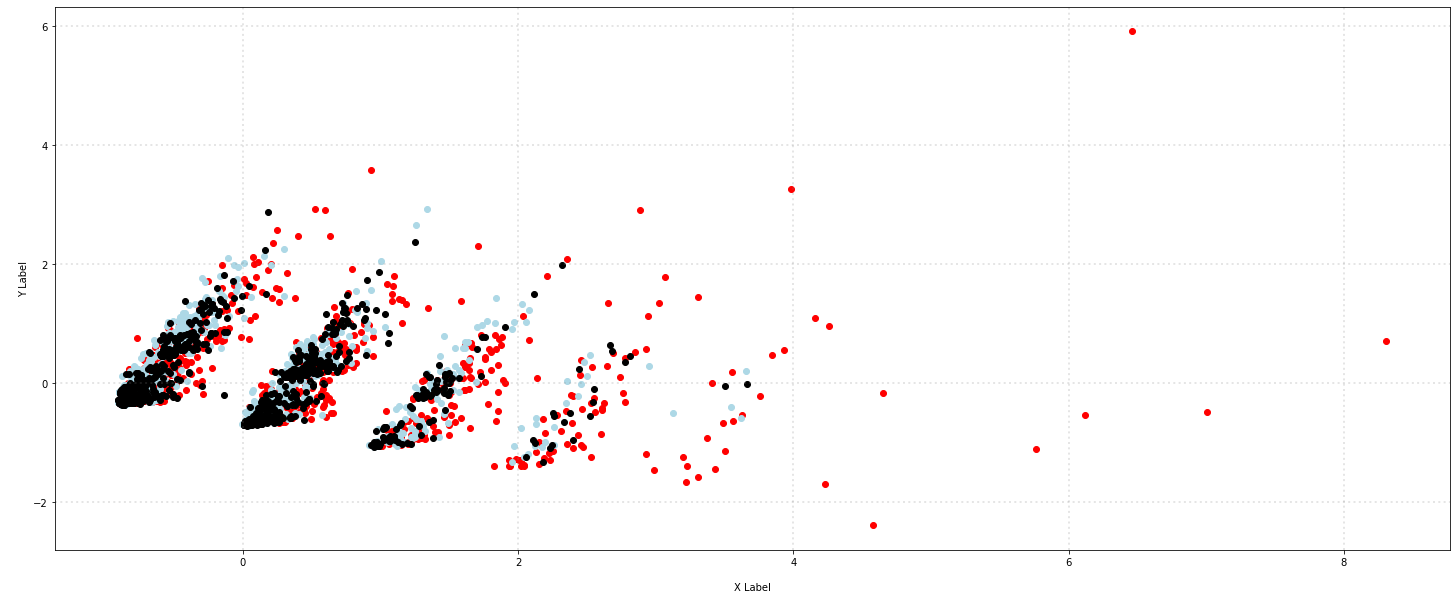

In [92]:
"""Plotting out the df_reduced"""
col = ['red', 'lightblue', 'black']
categories = ['imdb','amazon','yelp']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['company_name'] == category].T[0]
    ys = df_reduced[df['company_name'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [93]:
# plotly
import plotly.express as px

df_3Dim = PCA(n_components = 3).fit_transform(df_counts.toarray())

df_plotly = pd.DataFrame()

for c, category in zip(col, categories):
    xs = df_3Dim[df['company_name'] == category].T[0]
    ys = df_3Dim[df['company_name'] == category].T[1]
    zs = df_3Dim[df['company_name'] == category].T[2]
    df_sub = pd.DataFrame({'X':xs, 'Y':ys, 'Z':zs})
    df_sub['Category'] = category
    df_plotly = pd.concat([df_plotly, df_sub])
    

fig = px.scatter_3d(df_plotly, x='X', y='Y', z='Z',
              color='Category')

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [94]:
from mpl_toolkits.mplot3d import Axes3D

# plot 3D function
def plot3D(data, elev, azim):
    fig = plt.figure(figsize = (20,10))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    
    for c, category in zip(col, categories):
        xs = data[df['company_name'] == category].T[0]
        ys = data[df['company_name'] == category].T[1]
        zs = data[df['company_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', s=100, alpha=0.8)

    ax.set_xlabel('\nX Label')
    ax.set_ylabel('\nY Label')
    ax.set_zlabel('\nZ Label')

    ax.view_init(elev, azim)
    plt.show()

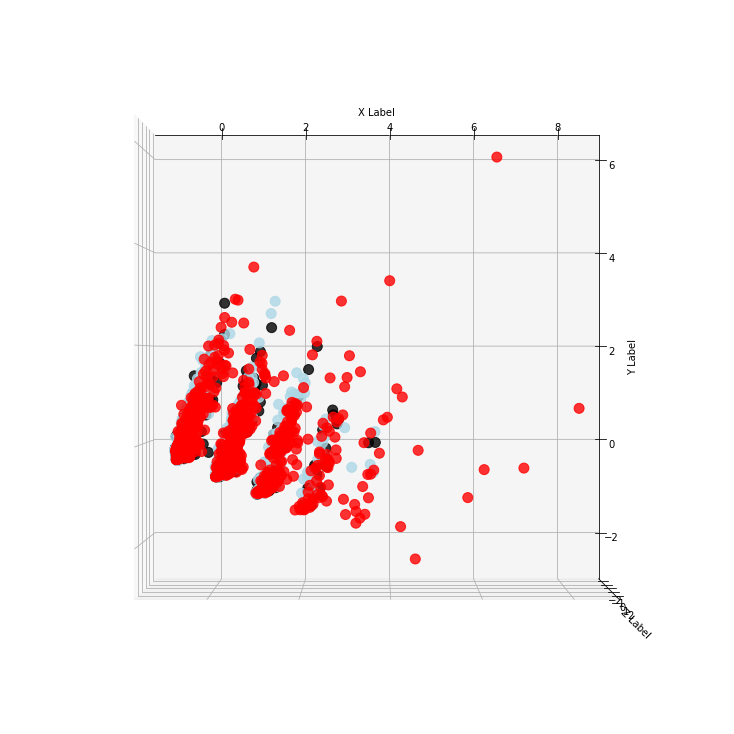

In [95]:
# from this perspective, it is eazy to see the pattern
plot3D(df_3Dim, 90,270)

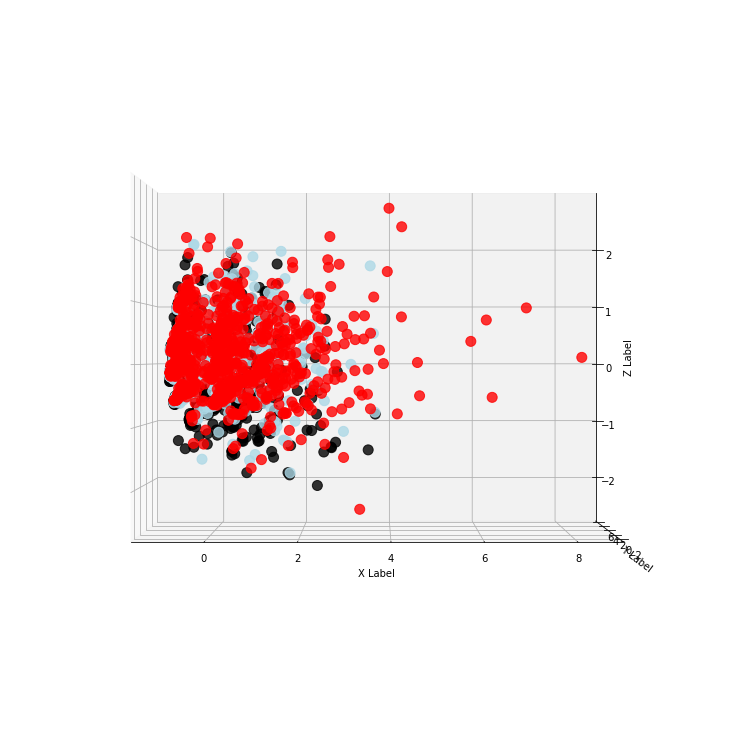

In [96]:
# from this perspective, it is hard to see the pattern
plot3D(df_3Dim, 0,270)

### 5.5 Attribute Transformation / Aggregation

In [97]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [98]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[0]

2

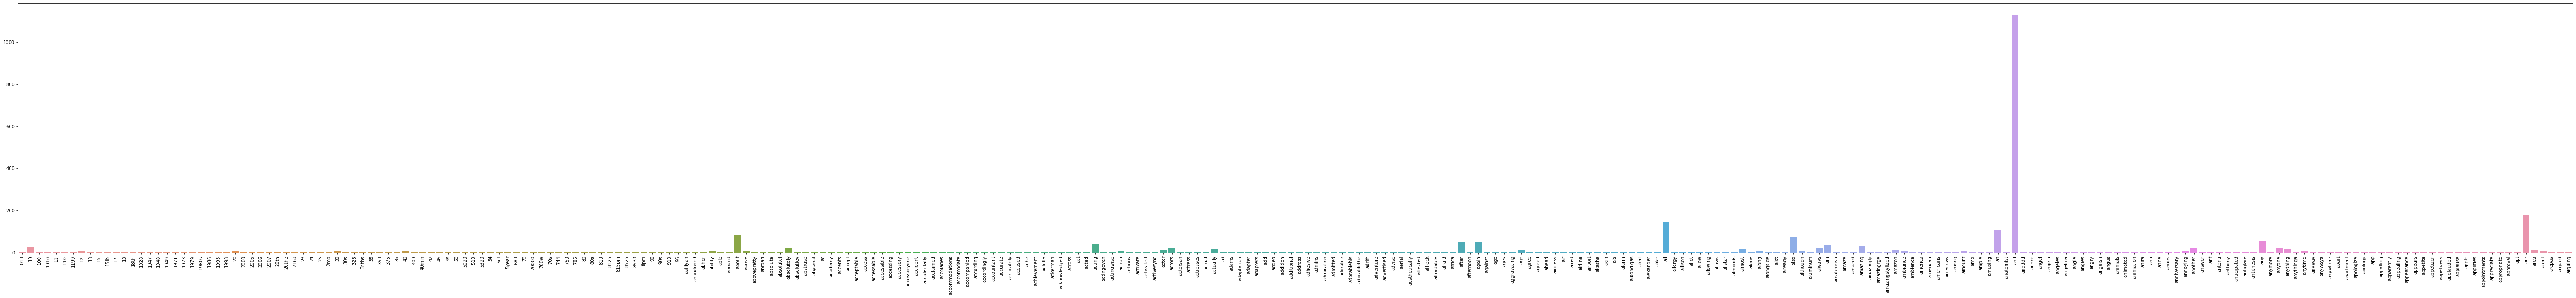

In [99]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_new.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect_new.get_feature_names_out()[:300], rotation = 90);

In [100]:
df_freq = pd.DataFrame({'feature':count_vect_new.get_feature_names_out()[:], 'freq':term_frequencies[:]})

fig = px.bar(df_freq[:300], x="feature", y="freq")
fig.show()

In [101]:
fig = px.bar(df_freq[df_freq['freq'] > 100], x="feature", y="freq", color='freq', template='ggplot2')
fig.show()

In [102]:
fig = px.bar(df_freq[:20], x="feature", y="freq", color='freq', template='ggplot2')
fig.show()

In [103]:
fig = px.bar(df_freq[:300], x="feature", y="freq", color="freq")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

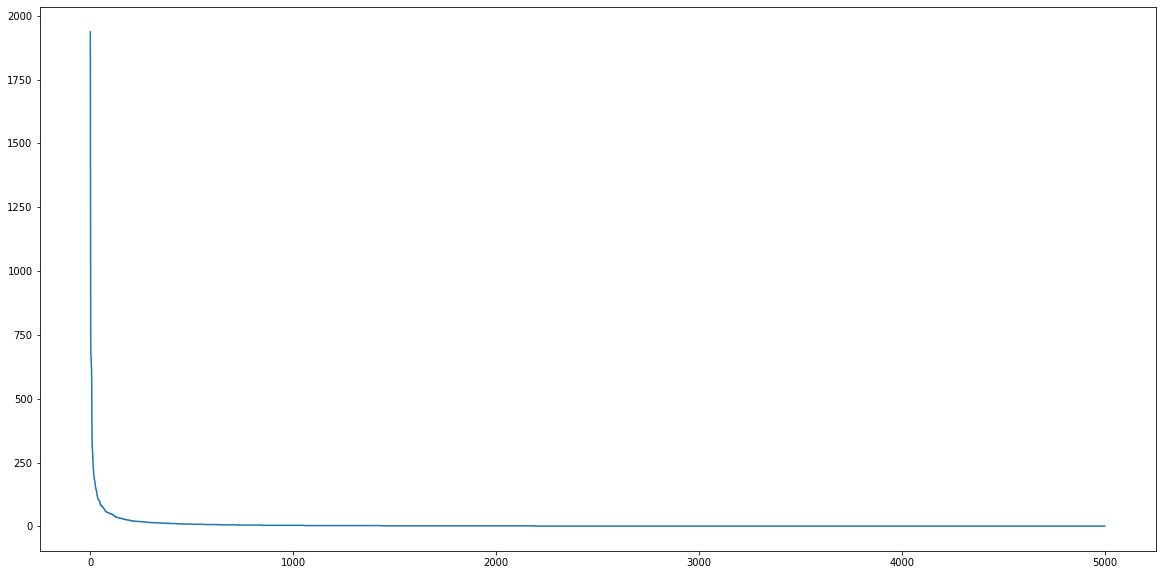

In [104]:
# the long tail plot
N = 5000
index = np.arange(N)
term_frequencies_sorted = np.sort(term_frequencies)[::-1]
fig = plt.figure(figsize = (20,10))
plt.plot(index, term_frequencies_sorted[:N])
plt.show()

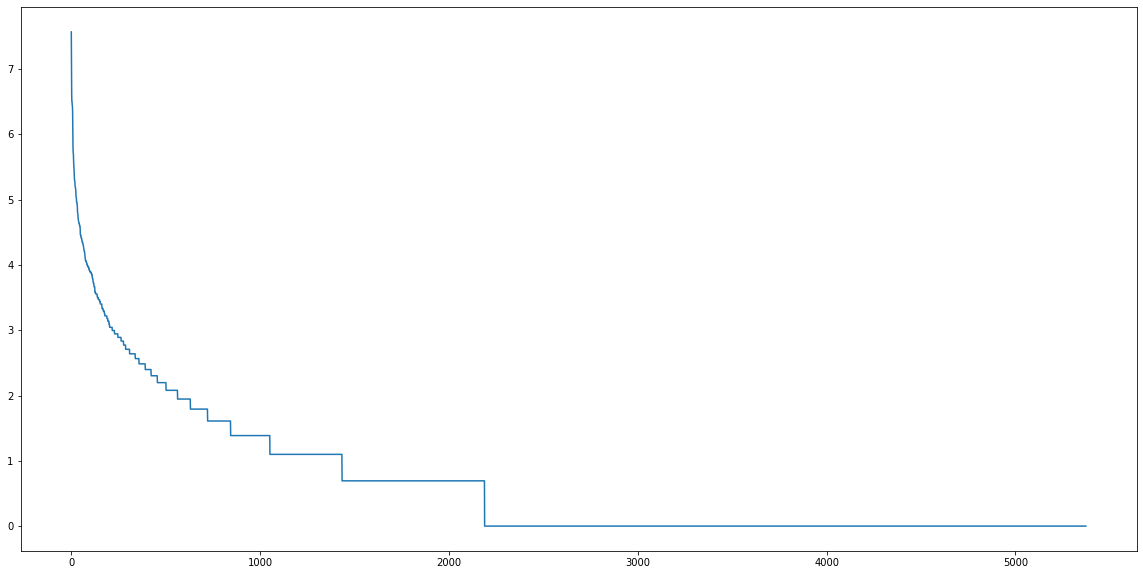

In [105]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
N = df_counts.shape[1]
index = np.arange(N)
term_frequencies_log_sorted = np.sort(term_frequencies_log)[::-1]
fig = plt.figure(figsize = (20,10))
plt.plot(index, term_frequencies_log_sorted[:N])
plt.show()

In [106]:
# Only get those with frequency over 5000 and do the sorting
fig = px.bar(df_freq[df_freq['freq'] > 100], x="feature", y="freq", color="freq")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

### 5.6 Discretization and Binarization

In [107]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(df.company)
mlb.classes_
df['bin_category'] = mlb.transform(df['company']).tolist()
df[0:9]

sentence label company_name  \
0  a very very very slowmoving aimless movie abou...     0         imdb   
1  not sure who was more lost  the flat character...     0         imdb   
2  attempting artiness with black  white and clev...     0         imdb   
3        very little music or anything to speak of       0         imdb   
4  the best scene in the movie was when gerardo i...     1         imdb   
5  the rest of the movie lacks art charm meaning ...     0         imdb   
6                                 wasted two hours       0         imdb   
7  saw the movie today and thought it was a good ...     1         imdb   
8                                a bit predictable       0         imdb   

   company                                           unigrams bin_category  
0        1  [a, very, very, very, slowmoving, aimless, mov...    [1, 0, 0]  
1        1  [not, sure, who, was, more, lost, the, flat, c...    [1, 0, 0]  
2        1  [attempting, artiness, with, black, white, and...    [1, 0, 0]  
3        1  [very, little, music, or, anything, to, speak,...    [1, 0, 0]  
4        1  [the, best, scene, in, the, movie, was, when, ...    [1, 0, 0]  
5        1  [the, rest, of, the, movie, lacks, art, charm,...    [1, 0, 0]  
6        1                               [wasted, two, hours]    [1, 0, 0]  
7        1  [saw, the, movie, today, and, thought, it, was...    [1, 0, 0]  
8        1                              [a, bit, predictable]    [1, 0, 0]

## 6. Data Exploration

In [108]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [109]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['im glad the film didnt go for the most obvious choice as a lesser film certainly would have  ']
['frankly after cotton club and unfaithful it was kind of embarrassing to watch lane and gere in this film because it is bad  ']
['it was so boring  ']


In [110]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect_new.transform(document_to_transform_1)
document_vector_count_2 = count_vect_new.transform(document_to_transform_2)
document_vector_count_3 = count_vect_new.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [111]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.083992
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Part 3: Specific tasks on the new dataset
3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).

## Some meaningful visualizations are already presented in part 2
## Below are other visualizations

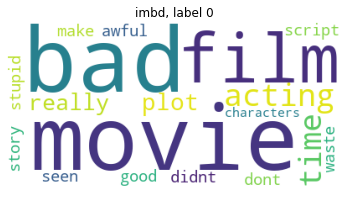

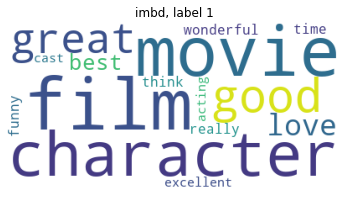

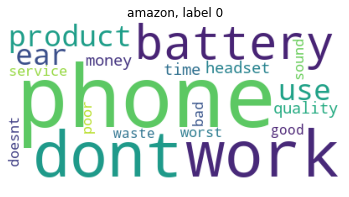

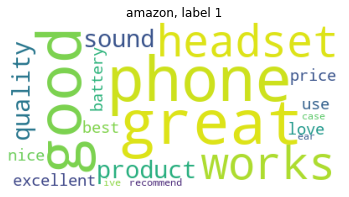

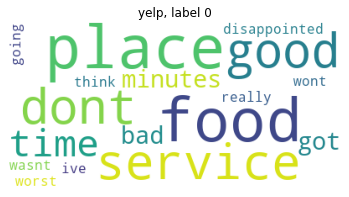

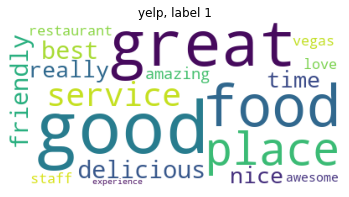

In [113]:
# Extract the most meaningful information from the comments of specifies companies
# important: remember to filter out stop words
def frequency_output(df, value):
    count_vect = CountVectorizer(stop_words='english')
    df_count = count_vect.fit_transform(df.sentence)
    analyze = count_vect.build_analyzer()
    d = {}
    for word in analyze(' '.join(list(df.sentence))):
        if word in d.keys():
            d[word] += 1
        else:
            d[word] = 1
            
    return {k:v for k, v in sorted(d.items(), key = lambda item: item[1])[::-1]}

# different company has different word cloud
df_imbd_0 = df[(df.company_name == 'imdb') & (df.label == '0')]
df_imbd_1 = df[(df.company_name == 'imdb') & (df.label == '1')]

df_amazon_0 = df[(df.company_name == 'amazon') & (df.label == '0')]
df_amazon_1 = df[(df.company_name == 'amazon') & (df.label == '1')]

df_yelp_0 = df[(df.company_name == 'yelp') & (df.label == '0')]
df_yelp_1 = df[(df.company_name == 'yelp') & (df.label == '1')]

freq_imdb_0 = frequency_output(df_imbd_0, 0)
freq_imdb_1 = frequency_output(df_imbd_1, 1)
freq_amazon_0 = frequency_output(df_amazon_0, 0)
freq_amazon_1 = frequency_output(df_amazon_1, 1)
freq_yelp_0 = frequency_output(df_yelp_0, 0)
freq_yelp_1 = frequency_output(df_yelp_1, 1)


from wordcloud import WordCloud

# Plot out the most frequent words from the sentences
# which tells us what things people tend to care more about the most.

# acting, plots, character and scripts --> the factor of what good movies should have.

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_imdb_0)[:20])))
plt.axis("off")
plt.title("imbd, label 0")
plt.show()

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_imdb_1)[:20])))
plt.axis("off")
plt.title("imbd, label 1")
plt.show()

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_amazon_0)[:20])))
plt.axis("off")
plt.title("amazon, label 0")
plt.show()

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_amazon_1)[:20])))
plt.axis("off")
plt.title("amazon, label 1")
plt.show()

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_yelp_0)[:20])))
plt.axis("off")
plt.title("yelp, label 0")
plt.show()

plt.imshow(WordCloud(background_color="white").generate(' '.join(list(freq_yelp_1)[:20])))
plt.axis("off")
plt.title("yelp, label 1")
plt.show()




#### Answer
From the word cloud, we can hypothesize that more negative words exist in the sentences of label 0, and more positive words exist in the sentence of label 1. Simply look at the cloud of imdb, the label 0 includes negative words such as bad, awful, waste, etc, while most words in label 1 are positive such as great, best, etc.

## TF-IDF features

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df.sentence.to_list()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names_out())
print(X.shape)

['010' '10' '100' ... 'zombie' 'zombiestudents' 'zombiez']
(2966, 5374)


In [115]:
# Reduction on TF-IDF features
X_reduced = PCA(n_components = 500).fit_transform(X.toarray())
print(X_reduced,end='\n\n')

# Reduction on count features
df_reduced = PCA(n_components = 500).fit_transform(df_counts.toarray())
print(df_reduced)

[[ 0.04215493  0.00132836  0.14616733 ...  0.02630932  0.00939353
  -0.01888183]
 [ 0.08971934 -0.00468574 -0.104313   ... -0.01133401 -0.0586383
   0.03782241]
 [ 0.14482959 -0.06448306 -0.06541332 ... -0.03139147  0.00790172
  -0.01520607]
 ...
 [ 0.01748722  0.24395431  0.00570389 ...  0.00597101 -0.00381241
   0.0094902 ]
 [ 0.06944182  0.06299214 -0.05999193 ... -0.01826985 -0.02463355
  -0.00222916]
 [ 0.03026067 -0.01541378 -0.15640745 ... -0.00075954 -0.01749091
   0.01627052]]

[[-0.81832543 -0.2051391  -0.09933993 ... -0.01818605  0.07316674
   0.00623607]
 [ 1.27315859 -0.9413503  -0.53134085 ... -0.06262878 -0.00296456
  -0.19125831]
 [ 2.94571637  1.13915568 -1.53539868 ... -0.16847632  0.10145853
  -0.0322071 ]
 ...
 [-0.49761749  0.51791871 -0.80536477 ...  0.01779398  0.02284421
  -0.06689122]
 [ 0.51695005  0.43264586 -0.70515566 ... -0.07175941  0.09949132
   0.03641432]
 [ 2.33314368 -0.65257027  0.11001846 ... -0.01540922 -0.02413718
   0.00654422]]


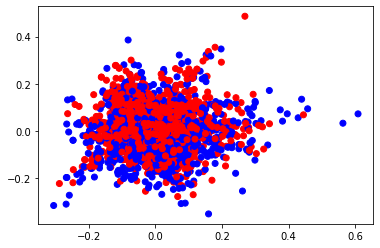

In [116]:
b = PCA(n_components = 2).fit_transform(X.toarray())
plt.scatter(b[:,0],b[:,1],c=list(map(lambda x:'red' if x =='0' else 'blue',df.label.to_list())))

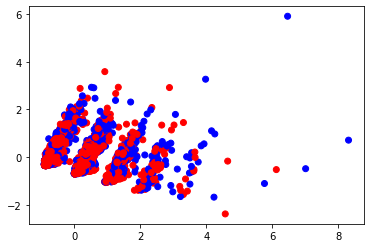

In [117]:
a = PCA(n_components = 2).fit_transform(df_counts.toarray())
plt.scatter(a[:,0],a[:,1],c=list(map(lambda x:'red' if x =='0' else 'blue',df.label.to_list())))

### Naive Bayes classifier

gnb.score with count-based method=  0.6347708894878706
bnb.score with count-based method=  0.6711590296495957


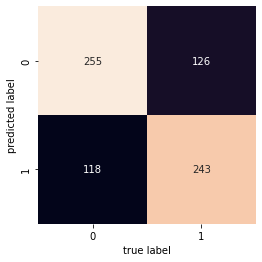

In [118]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(df_reduced, list(map(lambda x:int(x),df.label.to_list())), test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)
print('gnb.score with count-based method= ',gnb.score(X_test, Y_test))
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print('bnb.score with count-based method= ',bnb.score(X_test, Y_test))

labels = bnb.predict(X_test)
mat = confusion_matrix(Y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

gnb.score with TF-IDF method=  0.7304582210242587
bnb.score with TF-IDF method=  0.6576819407008087


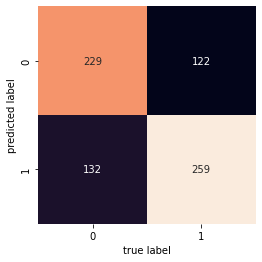

In [119]:
# TF-IDF
X_train, X_test, Y_train, Y_test = train_test_split(X_reduced, list(map(lambda x:int(x),df.label.to_list())), test_size=0.25)
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)
print('gnb.score with TF-IDF method= ',gnb.score(X_test, Y_test))
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
print('bnb.score with TF-IDF method= ',bnb.score(X_test, Y_test))

labels = bnb.predict(X_test)
mat = confusion_matrix(Y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

As shown above, the score of both classifiers are at around 0.60 to 0.70 and there is no significant difference between using term frequency and TF-IDF to build the classifiers. I think it is hard to extract more information and features in this case regarding the text. Since the result from both `df_reduced` and `X_reduced (TF-IDF operation)` are actually close and sometimes the score of `df_reduced` is higher, I would conclude that sentences that have similar meanings don't get closer or have smaller angles at space by IDF operation.

# Part 4
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade

## Numpy versus Pandas

In [120]:
import time
import numpy as np

### Pandas

In [121]:
start = time.time()
term_frequencies = []
for j in range(0, data_counts[:100].shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))
    
print(f'time : {time.time() - start} sec')

time : 10.533481121063232 sec


### Numpy

In [122]:
start = time.time()

term_frequencies = data_counts[:100].toarray().sum(axis=0)

print(f'time : {time.time() - start} sec')

time : 0.0022258758544921875 sec


From the time consumed above, it is obvious that `Pandas` is more time consuming than `Numpy`. `Numpy` is almost 10000 times faster than `Pandas`.

## Heat map of term-document matrix (between take home exercise 10 and 11)

The heatmap is extremely sparse, and with this huge amount of data, my laptop is not able to show the heatmap of the whole dataset. I noticed that this is not really efficient, so I use the `spy` which is meant to present sparse matrix. Besides the efficiency, this kind of sparse matrix make it really hard for people to read the whole chart. Also, I think the visualization of term-document matrix is not useful, so in my case, I would prefer to use word cloud to visualize the frequency.